**Machine Learning Basic Principles 2018 - Data Analysis Project Report**

# *Effect of using voting-classifier with three different models for music genre detection* 

## Abstract

In this study three different machine-learning classifiers to classify songs according to their musical genre. Furthermore, we compare their performance to the performance of a voting classifier combining two or three classifiers. The data is visualized using principal component analysis and the results are visualized using confusion matrices. Classifiers are initially evaluated using cross-validation techniques. The input data is observed to be imbalanced and resampling methods and penalizing models are used to fight this issue. However, for the best performance, the input data is only scaled without other any preprocessing. The best-performing approach is to include all three classifiers in the voting classifier. According to our analysis, using voting classifiers typically yields better performance than using only a single classifier.

## 1. Introduction

The aim of the project is to predict specific music genres of given songs using machine-learning techniques. This particular problem is a challenging one, and various approaches for it found in the literature include deep learning [1] and voting approaches [2]. Here, we focus on comparing the performances of three different machine learning techniques and their combinations using a voting classifier [3]. Through the project we hope to learn to use machine learning techniques on real data, to handle and visualize data in a clear manner, as well as reporting our numerical results in a precise and clear way.

Previous studies have shown that voting classifier can effectively combine individual classifiers [4,5]. Moreover, voting classifier have been used successfully in many different machine learning tasks such as identifying facial expressions and emotions, detecting lumbar herniation, speech emotion recognition, text classification and analyzing cancer microarray data [6,7,8,9,10,11].

Using individual classifiers is a good method for a specific purpose, and there is a limit for the performance of a single classifier. Moreover, it might be easier to combine classifiers than try to fine-tune or find the best individual one, especially in case when machine-learning problem is as difficult as music genre classification. This study aims to show that voting classifiers could outperform single classifiers.

### 1.1 Initialization code blocks

In [2]:
# First, let's import libraries...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import collections
import seaborn as sn

from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, SGDClassifier, PassiveAggressiveClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix
from IPython.display import display, HTML

In [3]:
# ... and define some helper functions

def plot_scatter(pca,y):
    # Creates scatter plots from the PCA
    PCA_2d = pca[:2,:]
    PCA_3d = pca[:3,:]
    idxs1=np.where(y == 1)[0]
    idxs2=np.where(y == 2)[0]
    idxs3=np.where(y == 3)[0]
    idxs4=np.where(y == 4)[0]
    idxs5=np.where(y == 5)[0]
    idxs6=np.where(y == 6)[0]
    idxs7=np.where(y == 7)[0]
    idxs8=np.where(y == 8)[0]
    idxs9=np.where(y == 9)[0]
    idxs10=np.where(y == 10)[0]
   
    plt.scatter(PCA_2d[0,idxs1],PCA_2d[1,idxs1],c='b',marker='o',label='Pop_Rock')
    plt.scatter(PCA_2d[0,idxs2],PCA_2d[1,idxs2],c='g',marker='^',label='Electronic')
    plt.scatter(PCA_2d[0,idxs3],PCA_2d[1,idxs3],c='r',marker='v',label='Rap')
    plt.scatter(PCA_2d[0,idxs4],PCA_2d[1,idxs4],c='c',marker='<',label='Jazz')
    plt.scatter(PCA_2d[0,idxs5],PCA_2d[1,idxs5],c='m',marker='>',label='Latin')
    plt.scatter(PCA_2d[0,idxs6],PCA_2d[1,idxs6],c='k',marker='s',label='RnB')
    plt.scatter(PCA_2d[0,idxs7],PCA_2d[1,idxs7],c='y',marker='P',label='International')
    plt.scatter(PCA_2d[0,idxs8],PCA_2d[1,idxs8],c='#ed9a09',marker='*',label='Country')
    plt.scatter(PCA_2d[0,idxs9],PCA_2d[1,idxs9],c='#8413ad',marker='D',label='Reggae')
    plt.scatter(PCA_2d[0,idxs10],PCA_2d[1,idxs10],c='#2dff99',marker='p',label='Blues')
    plt.legend()
    plt.title('Figure 2. PCA with two components')
    plt.xlabel('First principal component')
    plt.ylabel('Second principal component')
    plt.show()
    
    plt.scatter(np.mean(PCA_2d[0,idxs1]),np.mean(PCA_2d[1,idxs1]),c='b',marker='o',label='Pop_Rock')
    plt.scatter(np.mean(PCA_2d[0,idxs2]),np.mean(PCA_2d[1,idxs2]),c='g',marker='^',label='Electronic')
    plt.scatter(np.mean(PCA_2d[0,idxs3]),np.mean(PCA_2d[1,idxs3]),c='r',marker='v',label='Rap')
    plt.scatter(np.mean(PCA_2d[0,idxs4]),np.mean(PCA_2d[1,idxs4]),c='c',marker='<',label='Jazz')
    plt.scatter(np.mean(PCA_2d[0,idxs5]),np.mean(PCA_2d[1,idxs5]),c='m',marker='>',label='Latin')
    plt.scatter(np.mean(PCA_2d[0,idxs6]),np.mean(PCA_2d[1,idxs6]),c='k',marker='s',label='RnB')
    plt.scatter(np.mean(PCA_2d[0,idxs7]),np.mean(PCA_2d[1,idxs7]),c='y',marker='P',label='International')
    plt.scatter(np.mean(PCA_2d[0,idxs8]),np.mean(PCA_2d[1,idxs8]),c='#ed9a09',marker='*',label='Country')
    plt.scatter(np.mean(PCA_2d[0,idxs9]),np.mean(PCA_2d[1,idxs9]),c='#8413ad',marker='D',label='Reggae')
    plt.scatter(np.mean(PCA_2d[0,idxs10]),np.mean(PCA_2d[1,idxs10]),c='#2dff99',marker='p',label='Blues')
    plt.legend()
    plt.title('Figure 3. PCA with two components, mean values')
    plt.xlabel('First principal component')
    plt.ylabel('Second principal component')
    plt.show()
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(np.mean(PCA_3d[0,idxs1]),np.mean(PCA_3d[1,idxs1]),np.mean(PCA_3d[2,idxs1]),c='b',marker='o',label='Pop_Rock')
    ax.scatter(np.mean(PCA_3d[0,idxs2]),np.mean(PCA_3d[1,idxs2]),np.mean(PCA_3d[2,idxs2]),c='g',marker='^',label='Electronic')
    ax.scatter(np.mean(PCA_3d[0,idxs3]),np.mean(PCA_3d[1,idxs3]),np.mean(PCA_3d[2,idxs3]),c='r',marker='v',label='Rap')
    ax.scatter(np.mean(PCA_3d[0,idxs4]),np.mean(PCA_3d[1,idxs4]),np.mean(PCA_3d[2,idxs4]),c='c',marker='<',label='Jazz')
    ax.scatter(np.mean(PCA_3d[0,idxs5]),np.mean(PCA_3d[1,idxs5]),np.mean(PCA_3d[2,idxs5]),c='m',marker='>',label='Latin')
    ax.scatter(np.mean(PCA_3d[0,idxs6]),np.mean(PCA_3d[1,idxs6]),np.mean(PCA_3d[2,idxs6]),c='k',marker='s',label='RnB')
    ax.scatter(np.mean(PCA_3d[0,idxs7]),np.mean(PCA_3d[1,idxs7]),np.mean(PCA_3d[2,idxs7]),c='y',marker='P',label='International')
    ax.scatter(np.mean(PCA_3d[0,idxs8]),np.mean(PCA_3d[1,idxs8]),np.mean(PCA_3d[2,idxs8]),c='#ed9a09',marker='*',label='Country')
    ax.scatter(np.mean(PCA_3d[0,idxs9]),np.mean(PCA_3d[1,idxs9]),np.mean(PCA_3d[2,idxs9]),c='#8413ad',marker='D',label='Reggae')
    ax.scatter(np.mean(PCA_3d[0,idxs10]),np.mean(PCA_3d[1,idxs10]),np.mean(PCA_3d[2,idxs10]),c='#2dff99',marker='p',label='Blues')
    ax.legend()
    plt.title('Figure 4. PCA with three components, mean values')
    ax.set_xlabel('First principal component')
    ax.set_ylabel('Second principal component')
    ax.set_zlabel('Third principal component')
    plt.show()

# Functions for reading file etc.
def deleteContent(pfile):
    # deletes content of the file
    pfile.seek(0)
    pfile.truncate()

def writePredicted(predicted):
    # writes accuracy to file
    f = open("output_accuracy.csv","a")
    deleteContent(f)
    f.write("Sample_id,Sample_label\n")
    for i in range(predicted.shape[0]):
        f.write("%d,%d\n" % (i+1,predicted[i]))
    f.close()

def writeProbability(predictedproba):
    # writes probability to file
    f = open("output_proba.csv","a")
    deleteContent(f)
    f.write("Sample_id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9,Class_10\n")
    for i in range(predictedproba.shape[0]):
        f.write("%d,%f,%f,%f,%f,%f,%f,%f,%f,%f,%f\n" % (i+1,predictedproba[i,0],predictedproba[i,1],predictedproba[i,2],
                                                        predictedproba[i,3],predictedproba[i,4],predictedproba[i,5],
                                                        predictedproba[i,6],predictedproba[i,7],predictedproba[i,8],
                                                        predictedproba[i,9]))
    f.close()

def plot_confusion_matrices(cm1,cm2,cm3,cm4,cm5,cm6,cm7):
    # plots confusion matrices
    df_cm1 = pd.DataFrame(cm1, index = [i for i in ["Pop_rock","Electronic","Rap","Jazz","Latin","Rnb","International","Country","Reggae","Blues"]],
                      columns = [i for i in ["Pop_rock","Electronic","Rap","Jazz","Latin","Rnb","International","Country","Reggae","Blues"]])
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm1, annot=True)
    plt.title("Logistic Regression")
    plt.show()
    
    df_cm2 = pd.DataFrame(cm2, index = [i for i in ["Pop_rock","Electronic","Rap","Jazz","Latin","Rnb","International","Country","Reggae","Blues"]],
                      columns = [i for i in ["Pop_rock","Electronic","Rap","Jazz","Latin","Rnb","International","Country","Reggae","Blues"]])
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm2, annot=True)
    plt.title("Gradient Boosting")
    plt.show()
    
    df_cm3 = pd.DataFrame(cm3, index = [i for i in ["Pop_rock","Electronic","Rap","Jazz","Latin","Rnb","International","Country","Reggae","Blues"]],
                      columns = [i for i in ["Pop_rock","Electronic","Rap","Jazz","Latin","Rnb","International","Country","Reggae","Blues"]])
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm3, annot=True)
    plt.title("SGD")
    plt.show()
    
    df_cm4 = pd.DataFrame(cm4, index = [i for i in ["Pop_rock","Electronic","Rap","Jazz","Latin","Rnb","International","Country","Reggae","Blues"]],
                      columns = [i for i in ["Pop_rock","Electronic","Rap","Jazz","Latin","Rnb","International","Country","Reggae","Blues"]])
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm4, annot=True)
    plt.title("Voting with Logistic regression + Gradient boosting (hard)")
    plt.show()
    
    df_cm5 = pd.DataFrame(cm5, index = [i for i in ["Pop_rock","Electronic","Rap","Jazz","Latin","Rnb","International","Country","Reggae","Blues"]],
                      columns = [i for i in ["Pop_rock","Electronic","Rap","Jazz","Latin","Rnb","International","Country","Reggae","Blues"]])
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm5, annot=True)
    plt.title("Voting with Logistic regression + Gradient boosting (soft)")
    plt.show()
    
    df_cm6 = pd.DataFrame(cm6, index = [i for i in ["Pop_rock","Electronic","Rap","Jazz","Latin","Rnb","International","Country","Reggae","Blues"]],
                      columns = [i for i in ["Pop_rock","Electronic","Rap","Jazz","Latin","Rnb","International","Country","Reggae","Blues"]])
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm6, annot=True)
    plt.title("Voting with Logistic regression + Gradient boosting + SGD (hard)")
    plt.show()
    
    df_cm7 = pd.DataFrame(cm7, index = [i for i in ["Pop_rock","Electronic","Rap","Jazz","Latin","Rnb","International","Country","Reggae","Blues"]],
                      columns = [i for i in ["Pop_rock","Electronic","Rap","Jazz","Latin","Rnb","International","Country","Reggae","Blues"]])
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm7, annot=True)
    plt.title("Voting with Logistic regression + Gradient boosting + SGD (soft)")
    plt.show()



## 2. Data analysis

### 2.1 Class distribution

The distribution of genres on the training data is shown in Fig. 1. Clearly the genre “Rock_Pop” dominates and causes serious imbalance in the training data. This problem could be aided using resampling methods, either under or oversampling (explained below). We tried using an undersampling approach, but it failed to give better performance in the Kaggle competition. However, we further observe that the test data used in the competition also has similar imbalance issues. The benchmark “dummy” solution is such that it predicts all songs to belong to the class “Rock_Pop”, and according to Kaggle, it has 51% accuracy. In other words, 51% of the test data belong to “Rock_Pop”, making the data set similarly unbalanced. Thus in the end we decided not to apply any resampling methods for the data.

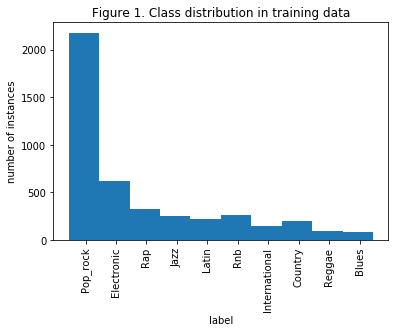

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263
0,1040.7,2315.6,2839.1,2552.2,2290.4,1913.8,2152.6,1930.3,2079.3,1706.7,1953.4,1513.5,1882.6,1802.7,2050.5,1891.1,1614.4,950.52,787.93,697.59,477.02,301.42,122.39,1.499,580.9,2149.8,1543.6,1046.4,1588.9,1388.5,1527.4,1135.0,1244.2,1088.6,1636.4,1044.8,1763.0,1476.8,1979.7,1503.2,1168.3,286.36,203.43,192.00,106.19,76.905,26.470,0.016,989.470,1484.400,744.62,367.04,961.96,1378.60,963.90,1206.20,926.070,1363.7,1262.30,1185.70,1566.60,1073.40,1383.60,1270.50,1197.40,857.27,1121.20,1373.70,1359.9,2052.6,2598.00,11504.0,3987.6,5632.8,3509.8,2556.8,4313.3,5500.1,3890.4,5192.5,3813.0,5921.8,4324.7,4601.6,7033.8,3856.0,5336.3,4940.8,4560.1,4190.1,5504.3,6080.7,5272.6,9246.9,12185.0,150390.0,831.58,1914.5,2639.0,2439.4,2064.3,1673.4,1931.5,1748.0,1846.5,1492.1,1566.5,1291.5,1552.6,1464.3,1697.6,1575.8,1344.2,863.88,726.28,590.76,393.19,217.53,66.000,1.066,6.04,203.38,430.02,500.56,217.93,303.61,209.62,214.75,291.37,198.77,202.13,169.68,210.85,165.78,231.08,258.48,176.54,21.119,73.797,80.082,37.997,24.555,1.593,1.066,4097.7,8669.9,7205.8,5314.4,7448.6,6748.8,6298.5,6559.9,6393.4,6705.8,6701.1,5542.9,8142.4,6256.2,7571.7,6894.4,5794.4,3102.8,2811.0,2781.5,1743.1,1705.5,1037.8,49.366,0.53113,0.27914,0.29100,0.18867,0.27142,0.43106,0.23045,0.30437,0.19682,0.36930,0.35071,0.22654,0.131870,0.054957,0.084974,0.037669,0.066023,0.125500,0.047220,0.094917,0.040921,0.110060,0.099065,0.045715,0.010,0.009,0.007,0.003,0.002,0.007,0.006,0.006,0.003,0.004,0.003,0.003,1.0,1.0,1.0,1.0,1.0,1.0,1.000,1.0,1.0,1.0,1.0,1.0,1000000.0,1000000.0,1000000.0,1000000.0,0.001894,-0.002000,0.001301,0.001159,-0.006528,-0.001903,0.001681,0.009920,0.036214,2.8778,2.20800,1.68550,0.83286,0.96904,0.63841,0.59397,0.51937,0.33370,0.29621,0.31271,0.014843,-0.16645,-0.11034,-0.17507,-0.117720,-0.192290,-0.082080,-0.085425,-0.085254,-0.067060,-0.055849,-0.052800,0.048145,0.17118,0.21649,0.36548,0.093584,0.16687,0.083426,0.118090,0.089792,0.074371,0.073162,0.059463
1,2309.4,4780.4,4055.7,3120.5,1979.9,2343.6,2634.2,3208.5,3078.0,3374.7,2618.4,2203.2,2917.9,2392.5,3412.5,3336.8,3195.5,3294.10,2555.60,2001.80,1508.30,1168.60,402.94,1.066,2038.8,2753.7,3077.1,1737.4,1074.1,1132.7,1457.2,2895.6,1763.7,3127.6,1480.6,1178.6,1790.6,1588.1,3341.0,3066.2,3481.4,3880.20,2245.00,1215.80,778.90,475.890,74.580,0.000,1169.700,344.560,417.17,472.37,1455.70,1366.80,421.84,428.64,86.718,296.7,480.75,638.11,321.61,681.03,640.37,548.78,816.21,643.31,459.62,522.25,540.8,601.9,848.17,1000.0,5639.6,3393.3,2759.4,3136.1,6513.9,8155.8,3109.7,2628.8,2481.3,2344.0,3278.5,4324.5,3119.0,3911.4,3685.8,3645.5,4673.5,3729.8,3175.7,3737.4,3651.3,3959.7,4198.4,1000.0,2048.90,4685.9,3753.2,2931.3,1821.0,2263.1,2535.8,3027.7,3073.4,2997.8,2537.3,2097.0,2792.3,2224.7,3189.0,3028.7,2766.7,2901.50,2180.20,1816.40,1341.20,1047.70,321.610,1.066,423.67,1052.90,829.21,619.61,315.85,522.90,490.80,525.86,521.01,537.73,453.12,373.04,582.47,271.38,549.15,629.27,612.76,697.750,580.240,442.140,278.230,220.440,41.559,1.066,7691.3,10338.0,9394.9,8255.0,7119.4,8600.6,7210.2,7387.6,7016.6,8037.9,7173.

,0
0,1
1,1
2,1


In [4]:
# Load the data
test_data_raw = pd.read_csv("test_data.csv",header=None)
train_data_raw = pd.read_csv("train_data.csv",header=None)
train_labels_raw = pd.read_csv("train_labels.csv",header=None)
dummy_solution_raw = pd.read_csv("dummy_solution_accuracy.csv",header=None)

test_data = test_data_raw.values
train_data = train_data_raw.values
train_labels = train_labels_raw.values

# plot histogram
plt.hist(train_labels[:,0])
plt.title('Figure 1. Class distribution in training data')
plt.xlabel('label')
plt.ylabel('number of instances')
plt.xticks(np.arange(1,10,0.9)+0.5, ("Pop_rock","Electronic","Rap","Jazz","Latin","Rnb","International","Country","Reggae","Blues"),rotation=90)
plt.show()

# display data
#display(HTML(test_data_raw.head(3).to_html(max_rows=3)))
display(HTML(train_data_raw.head(3).to_html(max_rows=3)))
display(HTML(train_labels_raw.head(3).to_html(max_rows=3)))

### Cleaning Part 1: Scaling
# See part 2.3

## MinMaxScaler
# This estimator scales and translates each feature individually such that it is in the 
# given range on the training set, i.e. between zero and one.
# http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

#scaler = MinMaxScaler()
#train_data = scaler.fit_transform(train_data)
#test_data = scaler.fit_transform(test_data)

## StandardScaler
# Standardize features by removing the mean and scaling to unit variance
# http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.fit_transform(test_data)

### 2.2 Data visualization

For the data visualization we perform a principal component analysis (PCA). This reduces the dimensions from the original number of features, 264, to two or three, which we can visualize using a two- or three-dimensional scatter plots. The data on the PCA scatter plot (see Figs. 2-4) is still somewhat scattered, but some trends can be observed. For example, the “Rock_Pop” songs seem to occupy the top-left corner, while “Blues” resides more in the center-right region. The average locations for different music genres in two- and three-dimensional PCA scatter plots are shown in the figures below the original PCA plot.

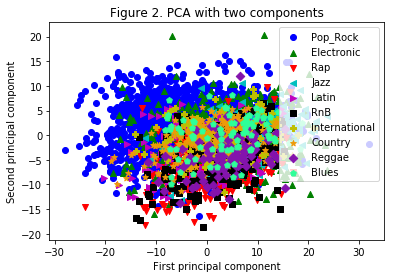

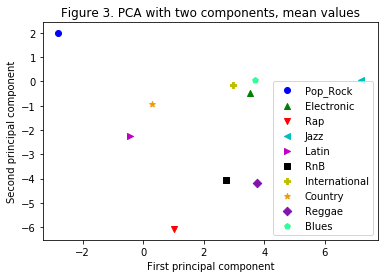

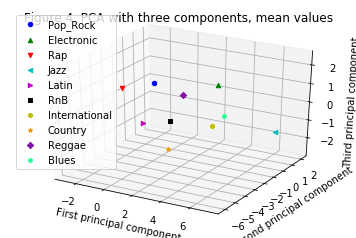

In [5]:
# PCA
pca=PCA(n_components=50)
pca.fit(train_data)

plot_scatter(pca.transform(train_data).T,train_labels)

### 2.3 Preprocessing

It is important to use scaler when preprocessing data for machine learning, because classifiers based on the Euclidean distance e.g. Logistic Regression will not perform best as possible, if features are in very different in terms of scales or unit as in our data [12]. This project tested both Min Max Scaler and Standard Scaler from Scikit-learn [13,14]. Min Max Scaler scales values between 0 and 1 by subtracting all values with the minimum and dividing them by difference between the maximum and minimum value. Standard Scaler transforms data into distribution, which mean value is 0 and standard deviation is 1. [12]

Min Max Scaler did not improve results significantly with our classification methods. Min Max Scaler ranges from 0 to 1, which is suboptimal for our classifiers, because it causes lower standard deviation [12]. However, the Standard Scaler did improve the results significantly, because it does not have this issue. In addition, it did make calculations faster. Because of these reasons, we used Standard Scaler for preprocessing.


### 2.4 Resampling

If the training data is imbalanced, and obtaining more data points is hard, one can try resample the data in order to make a better model [15]. Our data is imbalanced, and we implemented a simple undersampling method. It reduces the number of “Rock_Pop” songs in the training data to the same number of the genre with the second highest number of occurrences in the training data. This resampling procedure did not increase the performance of the model. In fact, the model using the undersampled data gave a typically 10 percentage points worse accuracy than the non-resampled method in Kaggle competition. Our undersampling algorithm is given in Appendix A.

### 2.5 Penalization

We also tried to the handle the imbalancing problem using penalized models. Penalized classification favors minority classes by adding an additional cost function to these classes [16]. Similar to the resampling approach, our attempts to use penalized models did not increase the performance. 

## 3. Methods and experiments

Our whole approach is visualized in the flowchart diagram below. Each part is explained individually in the text.

<center>&nbsp;</center>
<center>Figure 5. Flow diagram of our approach</center>

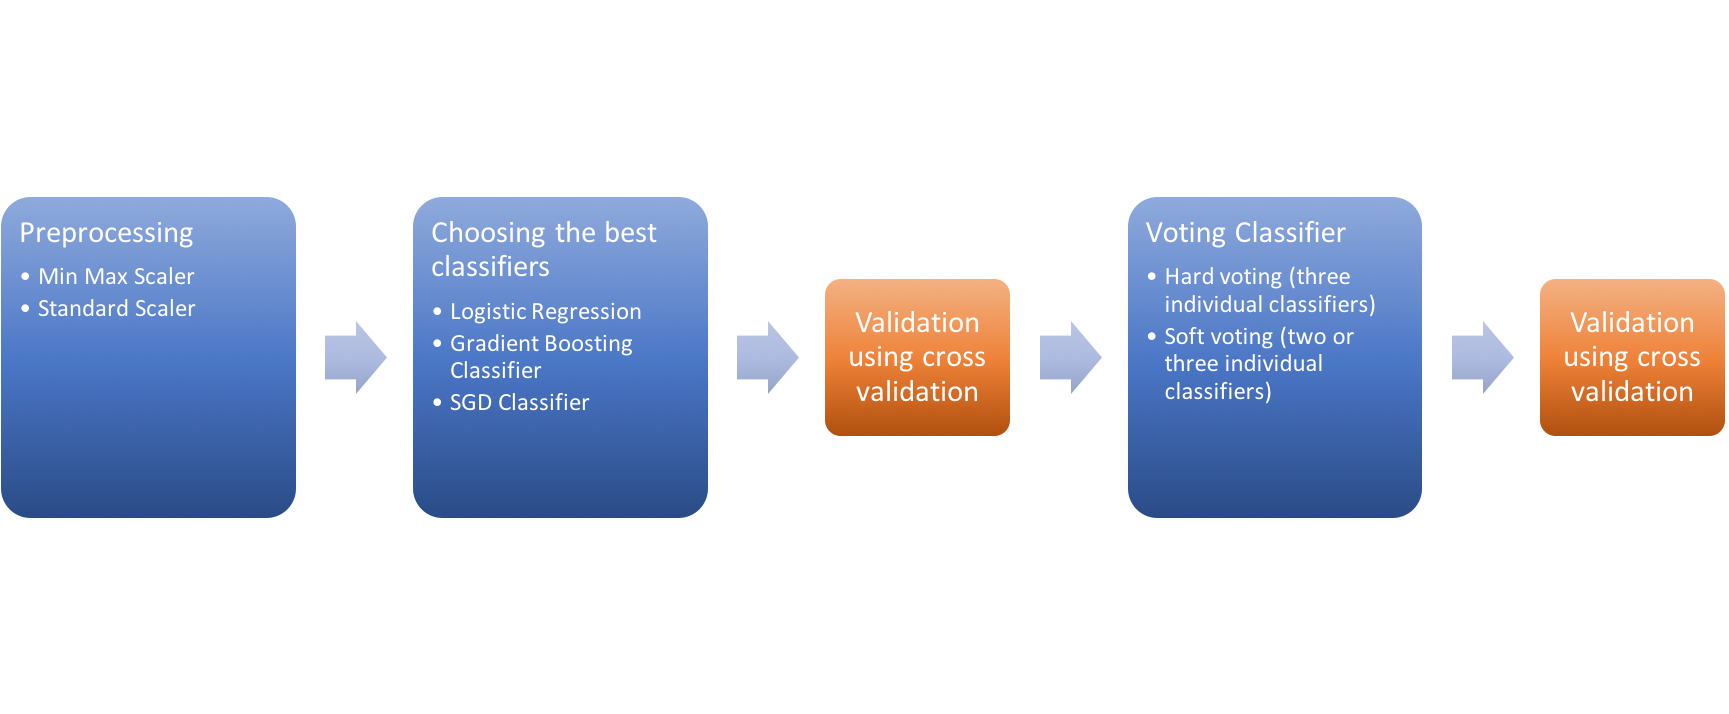

### 3.1 Machine learning classifiers

We made an extensive search of the methods listed in “sklearn” library and cherry-picked the ones that seemed to work best for our data. This choice was made by first estimating the performance of the model using cross-validation with mostly default parameters for the model. Then, these results were tested in the Kaggle competition. The best-performing models were chosen for our analysis. This procedure resulted in the models “Gradient boosting classifier” [17] and “SGD classifier” [18]. Some classifiers were dismissed due to not being suitable for our data. For example, Gaussian Process Classifier does not scale well for our sample size. For learning purposes, we also wanted to include “Logistic regression” [19] as a basic linear model to which we can compare the performances of the chosen methods. 


#### 3.1.1 Logistic Regression

Logistic Regression is a linear model in which the classification is done using a logistic function. In this project, we use the implementation of the model in “sklearn” library. [19]

#### 3.1.2 Gradient Boosting Classifier

While Logistic Regression is a linear model, Gradient Boosting Classifier instead is a tree-based model. It is an effective and robust method for various types of problems, but does not scale well to large datasets. [17]

#### 3.1.3 SGD Classifier

Stochastic Gradient Descent (SGD) Classifier is another linear model, which takes into use linear support vector machines and logistic regression. Similarly to other linear models, it scales well with large datasets. [18]

#### 3.1.4 Voting Classifier

Voting classifier combines machine learning classifiers with different working principles. Voting classifiers make use of best performing aspects of single classifiers. [20] There are two different voting methods, hard voting and soft voting. Hard voting uses majority vote to predict class labels and it can be used to combine three or more classifiers. It cannot produce logarithmic loss predictions. Soft voting predicts class labels based on the average predicted probabilities. Soft voting can be used to combine two or more classifiers. It also produces logistic loss predictions. Moreover, weights can be assigned to classifiers. [21] We have tested both hard and soft voting.


<span style="color:red">***Warning!*** Below code snippet takes some time to run! (~15 mins)</span>

In [6]:
#Analysis of the input data

# define input data
X = train_data
Xtest = test_data
y = np.reshape(train_labels,(len(train_labels),))

# define models and make fits to training data
# single classifiers
model1 = LogisticRegression()
model1fit = model1.fit(X, y)
print("Model 1 done")
model2 = GradientBoostingClassifier()
model2fit = model2.fit(X, y)
print("Model 2 done")
model3 = SGDClassifier(loss='log')
model3fit = model3.fit(X, y)
print("Model 3 done")

# voting classifiers, 2 models
modelvoting2hard = VotingClassifier(estimators=[('lr',model1),('gb',model2)],voting='hard').fit(X,y)
modelvoting2soft = VotingClassifier(estimators=[('lr',model1),('gb',model2)],voting='soft').fit(X,y)
print("Model Voting 2 done")

# voting classifiers, 3 models
modelvoting3hard = VotingClassifier(estimators=[('lr',model1),('gb',model2),('gp',model3)],voting='hard').fit(X,y)
modelvoting3soft = VotingClassifier(estimators=[('lr',model1),('gb',model2),('gp',model3)],voting='soft').fit(X,y)
print("Model Voting 3 done")

# Predict accuracy
predicted1 = model1fit.predict(Xtest)
predicted2 = model2fit.predict(Xtest)
predicted3 = model3fit.predict(Xtest)
predictedvoting2 = modelvoting2hard.predict(Xtest)
predictedvoting3 = modelvoting3hard.predict(Xtest)
predictedvotingsoft2 = modelvoting2soft.predict(Xtest)
predictedvotingsoft3 = modelvoting3soft.predict(Xtest)

# Predict probability
predictedproba1 = model1fit.predict_proba(Xtest)
predictedproba2 = model2fit.predict_proba(Xtest)
predictedproba3 = model3fit.predict_proba(Xtest)
predictedproba2voting = modelvoting2soft.predict_proba(Xtest)
predictedproba3voting = modelvoting3soft.predict_proba(Xtest)

# write to file
#writePredicted(predictedvoting)
#writeProbability(predictedproba3)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Model 1 done
Model 2 done


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


Model 3 done


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Model Voting 2 done


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this wa

Model Voting 3 done


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/base.py:297: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/base.py:304: RuntimeWarning: invalid value encountered in true_divide
  prob /= prob.sum(axis=1).reshape((prob.shape[0], -1))
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/base.py:297: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/base.py:297: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/base.py:304: RuntimeWarning: invalid value encountered in true_divide
  prob /= prob.sum(axis=1).reshape((prob.shape[0], -1))


In [7]:
# Write estimates for accuracy and log loss

# Calculate scores
trainpredict1 = model1fit.predict(X)
trainpredict2 = model2fit.predict(X)
trainpredict3 = model3fit.predict(X)
trainpredictvoting2 = modelvoting2hard.predict(X)
trainpredictvoting3 = modelvoting3hard.predict(X)
trainpredictvotingsoft2 = modelvoting2soft.predict(X)
trainpredictvotingsoft3 = modelvoting3soft.predict(X)

trainpredictproba1 = model1fit.predict_proba(X)
trainpredictproba2 = model2fit.predict_proba(X)
trainpredictproba3 = model3fit.predict_proba(X)
trainpredictprobavoting2 = modelvoting2soft.predict_proba(X)
trainpredictprobavoting3 = modelvoting3soft.predict_proba(X)

print("Logistic regression:")
print("Accuracy: %f; log loss: %f\n" % (accuracy_score(y,trainpredict1), log_loss(y,trainpredictproba1)))

print("Gradient boosting:")
print("Accuracy: %f; log loss: %f\n" % (accuracy_score(y,trainpredict2), log_loss(y,trainpredictproba2)))

print("SGD:")
print("Accuracy: %f; log loss: %f\n" % (accuracy_score(y,trainpredict3), log_loss(y,trainpredictproba3)))

print("Voting with Logistic regression + Gradient boosting:")
print("Accuracy, hard: %f; accuracy, soft: %f; log loss: %f\n" % (accuracy_score(y,trainpredictvoting2), accuracy_score(y,trainpredictvotingsoft2), log_loss(y,trainpredictprobavoting2)))

print("Voting with Logistic regression + Gradient boosting + SGD:")
print("Accuracy, hard: %f; accuracy; soft: %f; log loss: %f\n" % (accuracy_score(y,trainpredictvoting3), accuracy_score(y,trainpredictvotingsoft3), log_loss(y,trainpredictprobavoting3)))


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/base.py:297: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/base.py:297: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


Logistic regression:
Accuracy: 0.761403; log loss: 0.750520

Gradient boosting:
Accuracy: 0.920238; log loss: 0.398776

SGD:
Accuracy: 0.674077; log loss: 9.525637

Voting with Logistic regression + Gradient boosting:
Accuracy, hard: 0.804722; accuracy, soft: 0.857208; log loss: 0.511529

Voting with Logistic regression + Gradient boosting + SGD:
Accuracy, hard: 0.791886; accuracy; soft: 0.738253; log loss: 0.572031



/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/base.py:297: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


### 3.2 Cross Validation

Cross validation measures the stability of a classifier. A classifier can be fitted effectively to the training data. However, it does not give information on how classifier performs with independent data. A classifier might actually underfit or overfit the data. Cross validation reveals how generalizable are the results of a single classifier. In our study model we fit five times using different splits. Thus, it produces five different scores. Cross validation score is an average of these scores. Moreover, cross validation is very effective, because it does not need validation set and therefore wastes only a little of the data. [22,23,24]

Below we perform cross validation for various classifiers. First, we choose a large number of different classifiers and choose the best-performing ones for further analysis.

<span style="color:red">***Warning!*** Below code snippet takes some time to run! (~15+ mins)</span>

In [8]:
## CV Scores for Individual Classifiers and Voting Classifier Hard with Three Classifiers

clf1 = LinearSVC()
clf2 = PassiveAggressiveClassifier()
clf3 = MLPClassifier()
clf4 = GaussianNB()
clf5 = RandomForestClassifier()
clf6 = DecisionTreeClassifier()
clf7 = LogisticRegression()
clf8 = GradientBoostingClassifier()
clf9 = SGDClassifier()

#eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('sgdc', clf3)], voting='hard')

for clf, label in zip([clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8, clf9], ['Linear SVC', 'Passive Aggressive Classifier','MLP Classifier',
                                                            'Gaussian NB', 'Random Forest Classifier', 'Decision Tree Classifier',
                                                            'LogisticRegression','GradientBoostingClassifier','SGD Classifier']):
    scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy: 0.63 (+/- 0.01) [Linear SVC]


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If both are left un

Accuracy: 0.56 (+/- 0.02) [Passive Aggressive Classifier]


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy: 0.62 (+/- 0.01) [MLP Classifier]
Accuracy: 0.26 (+/- 0.03) [Gaussian NB]


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The de

Accuracy: 0.57 (+/- 0.01) [Random Forest Classifier]
Accuracy: 0.45 (+/- 0.01) [Decision Tree Classifier]


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

Accuracy: 0.64 (+/- 0.01) [LogisticRegression]
Accuracy: 0.63 (+/- 0.01) [GradientBoostingClassifier]


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=No

Accuracy: 0.62 (+/- 0.02) [SGD Classifier]


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


Based on the above-results (and the performance in Kaggle competitions), we decide to use Logistic Regression, Gradient Boosting, and SGD classifiers. Below we compute cross-validation for these and for the hard voting classifier using these three.

<span style="color:red">***Warning!*** Below code snippet takes some time to run! (~15+ mins)</span>

In [9]:
## CV Scores for Individual Classifiers and Voting Classifier Hard with Three Classifiers

clf1 = LogisticRegression()
clf2 = GradientBoostingClassifier()
clf3 = SGDClassifier()

eclf = VotingClassifier(estimators=[('lr', clf1), ('gbc', clf2), ('sgdc', clf3)], voting='hard')

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Gradient Boosting Classifier','SGD Classifier', 'Ensemble']):
    scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))



/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

Accuracy: 0.64 (+/- 0.01) [Logistic Regression]
Accuracy: 0.63 (+/- 0.01) [Gradient Boosting Classifier]


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=No

Accuracy: 0.61 (+/- 0.02) [SGD Classifier]


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If bo

Accuracy: 0.65 (+/- 0.01) [Ensemble]


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


Now we run cross-validation for only two classifiers and use soft voting.

<span style="color:red">***Warning!*** Below code snippet takes some time to run! (~15+ mins)</span>

In [10]:
## CV Scores for Individual Classifiers and Voting Classifier Soft with Two Classifiers

clf1 = LogisticRegression()
clf2 = GradientBoostingClassifier()

eclf = VotingClassifier(estimators=[('lr', clf1), ('gbc', clf2)], voting='soft')

for clf, label in zip([clf1, clf2, eclf], ['Logistic Regression', 'Gradient Boosting Classifier', 'Ensemble']):
    scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

Accuracy: 0.64 (+/- 0.01) [Logistic Regression]
Accuracy: 0.63 (+/- 0.01) [Gradient Boosting Classifier]


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

Accuracy: 0.66 (+/- 0.01) [Ensemble]


Here we run cross validation for the soft voting classifier with three classifiers.

<span style="color:red">***Warning!*** Below code snippet takes some time to run! (~15+ mins)</span>

In [11]:
## CV Scores for Individual Classifiers and Voting Classifier Soft with Three Classifiers

clf1 = LogisticRegression()
clf2 = GradientBoostingClassifier()
clf3 = SGDClassifier(loss='log')

eclf = VotingClassifier(estimators=[('lr', clf1), ('gbc', clf2), ('sgdc', clf3)], voting='soft')

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Gradient Boosting Classifier','SGD Classifier', 'Ensemble']):
    scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

Accuracy: 0.64 (+/- 0.01) [Logistic Regression]
Accuracy: 0.63 (+/- 0.01) [Gradient Boosting Classifier]


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=No

Accuracy: 0.61 (+/- 0.01) [SGD Classifier]


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/base.py:297: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)
/opt/conda/lib/python3.6/site-packages/s

Accuracy: 0.63 (+/- 0.01) [Ensemble]


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/base.py:297: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


## 4. Results

Here we collect results of our machine learning trials as computed above.

### 4.1 Performance measures

Performances of different classifiers are listed on the table below.

| Classifier                        	| Accuracy   |Accuracy CV (mean±std) | Accuracy (Kaggle) |  Log Loss | Log Loss (Kaggle)|	 
| ------------------------------------- |:----------:| ----------:| -----------------:|---------- |------------------|
| Logistic Regression               	| 0.761   	| 0.64±0.01  | 0.650          	|0.751   	|0.189          	|
| Gradient Boosting Classifier      	| 0.920   	| 0.63±0.01  | 0.642          	|0.399   	|0.180          	|
| SGD Classifier                    	| 0.674   	| 0.61±0.01  | 0.619          	|9.526   	|2.226         	|
| Voting Classifier Hard (Three Methods)| 0.789   	| 0.65±0.01  | 0.663         	|-      	|-             	|
| Voting Classifier Soft (Two Methods)  | 0.857   	| 0.66±0.01  | 0.660         	|0.512   	|0.170          	|
| Voting Classifier Soft (Three Methods)| 0.737   	| 0.63±0.01  | 0.661         	|0.576   	|0.178          	|

### 4.2 Confusion matrices

Confusion matrices for all three separate classifiers, as well as the voting classifiers, are shown below.

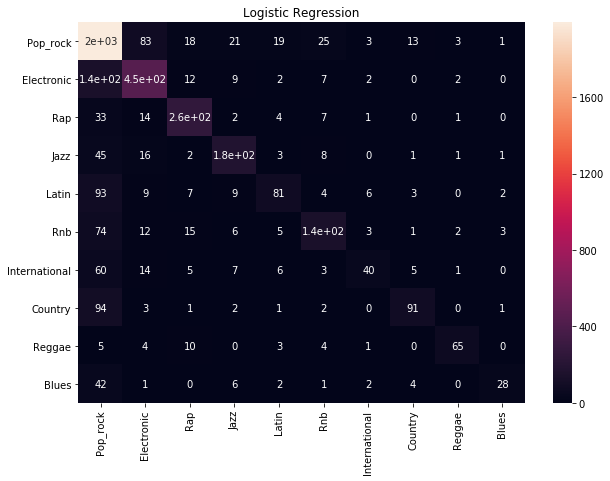

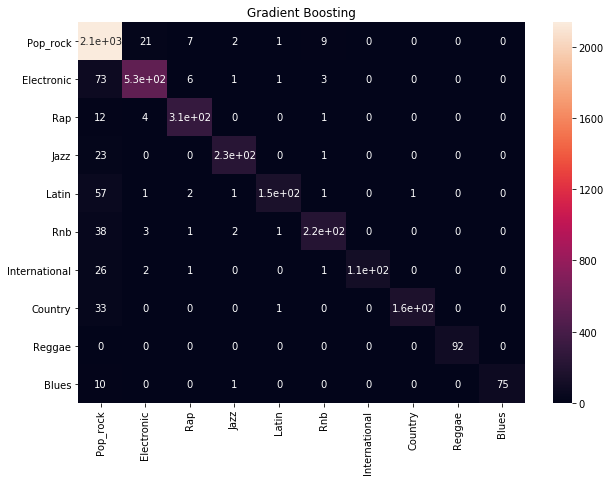

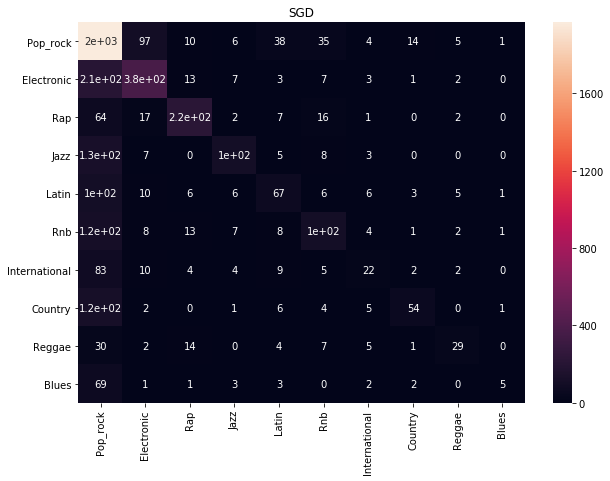

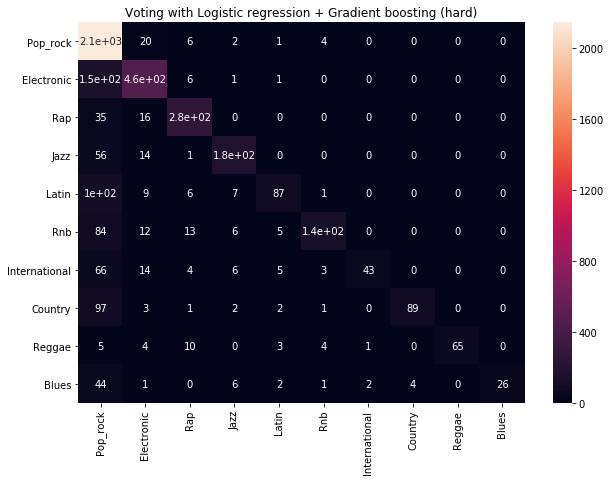

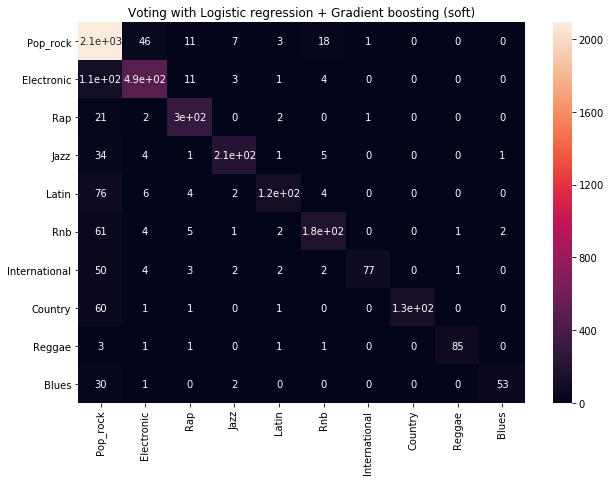

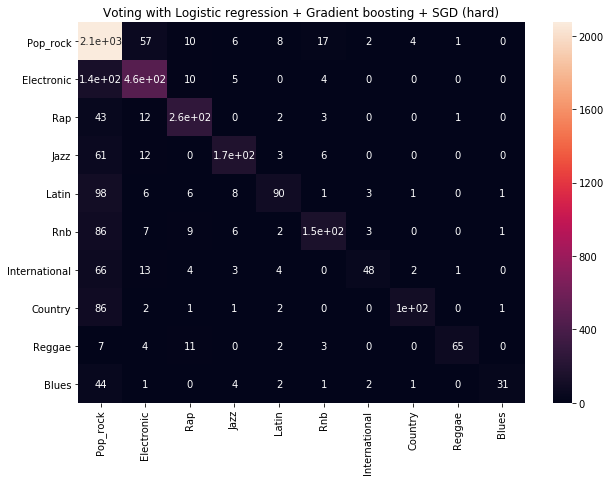

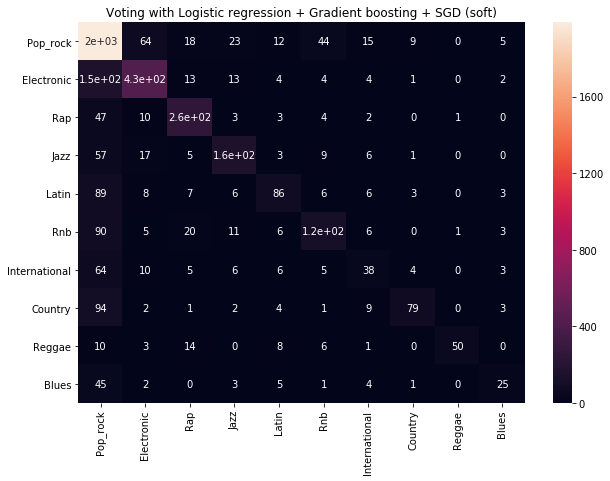

In [12]:
# Confusion matrices
cm1=confusion_matrix(y, trainpredict1)
cm2=confusion_matrix(y, trainpredict2)
cm3=confusion_matrix(y, trainpredict3)
cm4=confusion_matrix(y, trainpredictvoting2)
cm5=confusion_matrix(y, trainpredictvotingsoft2)
cm6=confusion_matrix(y, trainpredictvoting3)
cm7=confusion_matrix(y, trainpredictvotingsoft3)

plot_confusion_matrices(cm1,cm2,cm3,cm4,cm5,cm6,cm7)

## 5. Discussion/Conclusions

Out of the single classifiers, Logistic Regression seems to be best-performing classifier when using accuracy as the performance measure. Voting classifiers seem to yield better accuracy in the Kaggle competition than any single classifier by itself. However, the differences are small, and in the cross-validation it seems that Logistic Regression actually gives better accuracy than Soft Voting using three classifiers. However, accuracy is not a very good indicator of model performance for imbalanced datasets [25]. Based on the confusion matrices, genres like "Electronic", "RnB" and "Country" are often misinterpreted as "Rock_Pop". On the other hand, "Reggae" songs seem to be relatively easy to recognize.

Performances in the Kaggle competition are better than in the cross validation. This could be explained by the fact that in the cross-validation only a part of the data is used to build the model, while for the Kaggle competition all of the data is used in the model building. Voting classifiers work better than single classifiers because they in a way use the results of all classifiers and tend to pick the ones where the classifiers agree on the results. Thus, assuming you are using well-performing classifiers, voting classifiers should also work well.

Logistic loss is a measure of a classifiers accuracy. It penalizes from false classifications. The penalty will increase, if classifier is assuring about classification that turns out to be incorrect. [26] Both Logistic Regression and Gradient Boosting Classifier give accurate classifications in terms of logistic loss as well as in terms of accuracy. However, SGD Classifier assigns too confidently to incorrect class, which results in poor performance in logistic loss although the results in accuracy are very good. Soft voting gives good results with both two and three classifiers on logistic loss and only Gradient Boosting Classifiers have better results over combining individual classifiers. However, in the Kaggle competition voting classifier outperforms all individual classifiers. There is only a small difference between the performances of voting classifiers using two or three models. The voting classifiers create a more stable model by combining different classifiers. Moreover, the results of individual classifiers are all better in Kaggle competition than on the training data.

In this study the only preprocessing we did for the original data was Standard Scaling. One thing to try to improve our results is to reduce the dimensions of the input data by using for example PCA. This would battle against overfitting and also make the calculations computationally easier. Finding the optimal number of principal coordinates would be an interesting task to pursue. Another point of improvement is to actually fine-tune the parameters of the classifiers. We mostly used the default parameters, but the optimal values depend on the problem at hand. This fine-tuning could be done for example using a “Grid Search” [27], assigning weights for different classifiers based on their performances or using confusion matrices to see which classifier works well with which class.

In Ref. [2] the author used a similar voting-classifier based approach to solve the same problem. Their reported best accuracy was 0.65 using an ensemble of “Extreme Gradient Boosting” and “VGG-16” methods, which are reported to be very high-performing methods. Their accuracies are comparable to our results from the Kaggle competition. As in the previous studies, also our study showed that voting classifier is a powerful method. Combining methods increased performances over any single classifier.

## 6. References

[1] J. Despois, "Finding the genre of a song with Deep Learning", https://hackernoon.com/finding-the-genre-of-a-song-with-deep-learning-da8f59a61194, accessed 30.10.2018.

[2] H. Bahuleyan, "Music Genre Classification using Machine Learning Techniques", arXiv:1804:01149.

[3] "sklearn.ensemble.VotingClassifier", http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html, accessed 30.10.2018.

[4] E. Bauer et al., “An empirical comparison of voting classification algorithms - Bagging, boosting, and variants”, Machine Learning 36, 105 (1999).

[5] R. E. Shapire et al., “Boosting the margin - A new explanation for the effectiveness of voting methods”, The Annals of Statistics 26, 5 (1998).

[6] N. Sebe et al., “Authentic facial expression analysis”, Image and Vision Computing 25, 1856 (2007).

[7] S. Ghosh et al., “Computer-aided diagnosis for lumbar MRI using heterogeneous classifiers”, IEEE International Symposium on Biomedical Imaging 1179, (2011).

[8] T. Anagnostopoulos et al., “Ensemble majority voting classifier for speech emotion recognition and prediction”, Journal of Systems and Information Technology 16, 3 (1997).

[9] A. Danesh et al., “Improve text classification accuracy based on classifier fusion methods”, 10th International Conference on Information Fusion 1, (2007).

[10] D. R. Rhodes et al., “Large-scale meta-analysis of cancer microarray data identifies common transcriptional profiles of neoplastic transformation and progression”, Proceedings of the National Academy of Sciences of the United States of America 101, 25 (2004).

[11] K. R. Remya et al., “Using weighted majority voting classifier combination for relation classification in biomedical texts”, Control, Instrumentation, Communication and Computational Technologies 1205, (2014). 

[12] R. Mahajan, "Standard Scaler v Min Max Scaler in Machine Learning", http://rajeshmahajan.com/standard-scaler-v-min-max-scaler-machine-learning/, accessed 1.11.2018.

[13] "sklearn.preprocessing.StandardScaler", http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html, accessed 1.11.2018.

[14] "sklearn.preprocessing.MinMaxScaler", http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html, accessed 1.11.2018.

[15] M. Altini, “Dealing with imbalanced data: undersampling, oversampling and proper cross-validation”, https://www.marcoaltini.com/blog/dealing-with-imbalanced-data-undersampling-oversampling-and-proper-cross-validation, accessed 30.10.2018.

[16] J. Brownlee, “8 Tactics to Combat Imbalanced Classes in Your Machine Learning Dataset”, https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/, accessed 1.11.2018.

[17] "sklearn.ensemble.GradientBoostingClassifier", http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html, accessed 30.10.2018.

[18] "sklearn.linear_model.SGDClassifier", http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html, accessed 30.10.2018.

[19] "sklearn.linear_model.LogisticRegression", http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html, accessed 30.10.2018.

[20] "Two is better than one: Ensembling Models", https://towardsdatascience.com/two-is-better-than-one-ensembling-models-611ee4fa9bd8, accessed 1.11.2018.

[21] "Ensemble methods", http://scikit-learn.org/stable/modules/ensemble.html, accessed 1.11.2018.

[22] "Cross-validation: evaluating estimator performance", http://scikit-learn.org/stable/modules/cross_validation.html, accessed 1.11.2018.

[23] P. Gupta, "Cross-Validation in Machine Learning", https://towardsdatascience.com/cross-validation-in-machine-learning-72924a69872f, accessed 1.11.2018.

[24] J. Brownlee, "A Gentle Introduction to k-fold Cross-Validation", https://machinelearningmastery.com/k-fold-cross-validation/, accessed 1.11.2018.

[25] "How to Handle Imbalanced Classes in Machine Learning", https://elitedatascience.com/imbalanced-classes, accessed 1.11.2018.

[26] A. B. Collier, "Making Sense of Logarithmic Loss", https://datawookie.netlify.com/blog/2015/12/making-sense-of-logarithmic-loss/, accessed 1.11.2018.

[27] sklearn.model_selection.GridSearchCV, http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html, accessed 30.10.2018.


## Appendix A

Our implementation of the resampling algorithm.

In [13]:
# resampling (undersampling)

def count_labels(train_labels):
    label_count = np.zeros((10,))
    for i in range(10):
        label_count[i]=len(train_labels[train_labels == i+1])
    return label_count

def undersample(train_labels,train_data):
    label_count = np.zeros((10,))
    for i in range(10):
        label_count[i]=len(train_labels[train_labels == i+1])
    deletednum = 0
    todelete = label_count[0]-label_count[1]
    indicestodel = np.zeros((int(todelete),))
    for i in range(len(train_labels)):
        if train_labels[i]==1:
            indicestodel[deletednum] = int(i)
            deletednum+=1
        if deletednum>=todelete:
            break
    train_labels = np.delete(train_labels,indicestodel.astype(int))
    train_data = np.delete(train_data,indicestodel.astype(int),0)
    return train_labels, train_data

label_count = count_labels(train_labels)

print("Before resampling: ")
print("1: %d, 2: %d, 3: %d, 4: %d, 5: %d, 6: %d, 7: %d, 8: %d, 9: %d, 10: %d" % (label_count[0],label_count[1],label_count[2],
                                                                                 label_count[3],label_count[4],label_count[5],
                                                                                 label_count[6],label_count[7],label_count[8],
                                                                                 label_count[9]))
train_labels_us, train_data_us = undersample(train_labels,train_data)
label_count = count_labels(train_labels_us)
print("After resampling: ")
print("1: %d, 2: %d, 3: %d, 4: %d, 5: %d, 6: %d, 7: %d, 8: %d, 9: %d, 10: %d" % (label_count[0],label_count[1],label_count[2],
                                                                                 label_count[3],label_count[4],label_count[5],
                                                                                 label_count[6],label_count[7],label_count[8],
                                                                                 label_count[9]))

Before resampling: 
1: 2178, 2: 618, 3: 326, 4: 253, 5: 214, 6: 260, 7: 141, 8: 195, 9: 92, 10: 86
After resampling: 
1: 618, 2: 618, 3: 326, 4: 253, 5: 214, 6: 260, 7: 141, 8: 195, 9: 92, 10: 86
